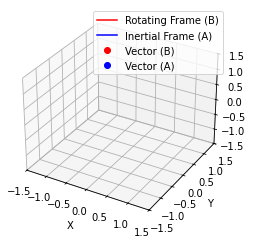

In [2]:
# Fixing the animation issue by properly handling the 3D data update
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parameters for the example
omega_BA = np.array([0, 0, 1])  # Angular velocity of B relative to A (rad/s)
v_B_initial = np.array([1, 0, 0])  # Initial vector in the rotating frame (B)
dt = 0.01  # Time step (s)
steps = 500  # Number of time steps

# Storage for vector evolution
v_B_list = [v_B_initial]
v_A_list = [v_B_initial]

# Rotation matrix for small time step
def rotation_matrix(omega, dt):
    theta = np.linalg.norm(omega) * dt
    if theta == 0:
        return np.eye(3)
    axis = omega / np.linalg.norm(omega)
    K = np.array([[0, -axis[2], axis[1]],
                  [axis[2], 0, -axis[0]],
                  [-axis[1], axis[0], 0]])
    return np.eye(3) + np.sin(theta) * K + (1 - np.cos(theta)) * np.dot(K, K)

# Compute the vectors over time
for _ in range(steps):
    # Update in frame B (rotating frame)
    v_B = np.dot(rotation_matrix(omega_BA, dt), v_B_list[-1])
    v_B_list.append(v_B)

    # Update in frame A (inertial frame)
    v_A = v_A_list[-1] + np.cross(omega_BA, v_A_list[-1]) * dt
    v_A_list.append(v_A)

v_B_list = np.array(v_B_list)
v_A_list = np.array(v_A_list)

# Plot and animate
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

line_B, = ax.plot([], [], [], 'r-', label='Rotating Frame (B)')
line_A, = ax.plot([], [], [], 'b-', label='Inertial Frame (A)')
point_B, = ax.plot([], [], [], 'ro', label='Vector (B)')
point_A, = ax.plot([], [], [], 'bo', label='Vector (A)')

def update(frame):
    # Update the rotating frame (B) vector
    line_B.set_data(v_B_list[:frame, 0], v_B_list[:frame, 1])
    line_B.set_3d_properties(v_B_list[:frame, 2])
    point_B.set_data([v_B_list[frame, 0]], [v_B_list[frame, 1]])
    point_B.set_3d_properties([v_B_list[frame, 2]])

    # Update the inertial frame (A) vector
    line_A.set_data(v_A_list[:frame, 0], v_A_list[:frame, 1])
    line_A.set_3d_properties(v_A_list[:frame, 2])
    point_A.set_data([v_A_list[frame, 0]], [v_A_list[frame, 1]])
    point_A.set_3d_properties([v_A_list[frame, 2]])

    return line_B, point_B, line_A, point_A

ani = FuncAnimation(fig, update, frames=steps, interval=20, blit=False)
plt.legend()
plt.show()